##### ODE - 1

In [1]:
import autograd.numpy as np
import autograd
from autograd import grad
import autograd.numpy.random as npr
from autograd.core import primitive
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nx = 10
dx = 1. / nx

In [3]:
def A(x):
    # LHS
    return x + (1. + 3. * x ** 2) / (1. + x + x ** 3)


def B(x):
    # RHS
    return x ** 3 + 2. * x + x ** 2 * ((1. + 3 * x ** 2) / (1. + x + x ** 3))


def f(x, psy):
    # d(psy) / dx = f(x, psy)
    return B(x) - psy * A(x)


def psy_analytic(x):
    # Analytic solution to problem
    return (np.exp((-x ** 2) / 2.)) / (1. + x + x ** 3) + x ** 2

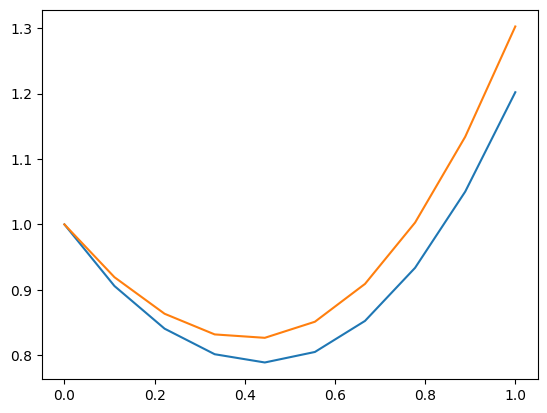

In [4]:
 x_space = np.linspace(0, 1, nx)
 y_space = psy_analytic(x_space)
 psy_f = np.zeros_like(y_space)
 psy_f[0] = 1
 
 for i in range(1, len(x_space)):
    psy_f[i] = psy_f[i - 1] + B(x_space[i]) * dx - psy_f[i - 1] * A(x_space[i]) * dx
    
plt.figure()
plt.plot(x_space, y_space)
plt.plot(x_space, psy_f)
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_net(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def ddx_neural_net(W, x, k = 1):
    return np.dot(np.dot(W[1].T, W[0].T ** k), sigmoid_grad(x))


def loss_func(W, x):
    loss_sum = 0
    for xi in x:
        nn_out = neural_net(W, xi)[0][0]
        psy_t = 1 + xi * nn_out
        dnn_out = ddx_neural_net(W, xi)[0][0]
        d_psy_t = nn_out + xi * dnn_out
        func = f(xi, psy_t)
        sqr_err = (d_psy_t - func) ** 2
        
        loss_sum += sqr_err
    return loss_sum

In [6]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(1000):
    loss_grad = grad(loss_func)(W, x_space)
    
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

0.21332695567878499
[array([[-0.11834714,  0.87882296, -0.67193377, -0.28208802, -1.83647047,
        -0.04718985, -0.3913477 , -0.36983017,  0.98232759, -0.36465149]]), array([[-0.35690612],
       [ 0.71139156],
       [-0.36947628],
       [ 0.30028456],
       [-2.31493527],
       [ 0.09060507],
       [ 0.28782771],
       [-1.73311014],
       [ 0.77312413],
       [ 0.28374424]])]


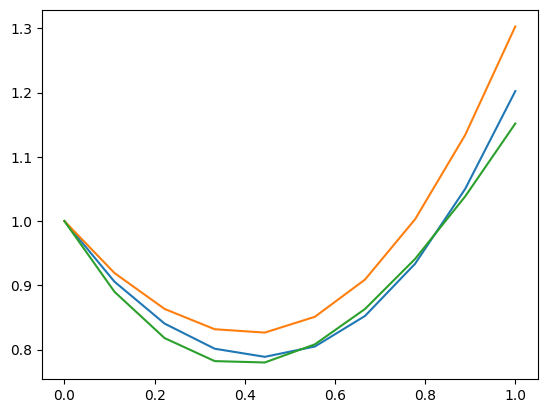

In [7]:
print(loss_func(W, x_space))
res = [1 + xi * neural_net(W, xi)[0][0] for xi in x_space]

print(W)

plt.figure()
plt.plot(x_space, y_space)
plt.plot(x_space, psy_f)
plt.plot(x_space, res)
plt.show()

##### ODE - 2

In [8]:
nx = 10
dx = 1. / nx

In [9]:
def f(x, psy, dpsy):
    # RHS
    return -1. / 5. * np.exp(-x / 5.) * np.cos(x) - 1. / 5. * dpsy - psy


def psy_analytic(x):
    # Analytic solution
    return np.exp(-x / 5.) * np.sin(x)

In [10]:
x_space = np.linspace(0, 2, nx)
y_space = psy_analytic(x_space)

In [12]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))


def neural_net(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_net_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def psy_trial(xi, net_out):
    return xi + xi ** 2 * net_out


psy_grad = grad(psy_trial)
psy_grad2 = grad(psy_grad)


def loss_func(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_net(W, xi)[0][0]
        
        net_out_d = grad(neural_net_x)(xi)
        net_out_dd = grad(grad(neural_net_x))(xi)
        
        psy_t = psy_trial(xi, net_out)
    
        trial_gradient = psy_grad(xi, net_out)
        trial_gradient_2 = psy_grad2(xi, net_out)
        
        func = f(xi, psy_t, trial_gradient)
        
        sqr_err = (trial_gradient_2 - func) ** 2
        loss_sum += sqr_err
        
    return loss_sum

In [13]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad = grad(loss_func)(W, x_space)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

0.5650339301263175


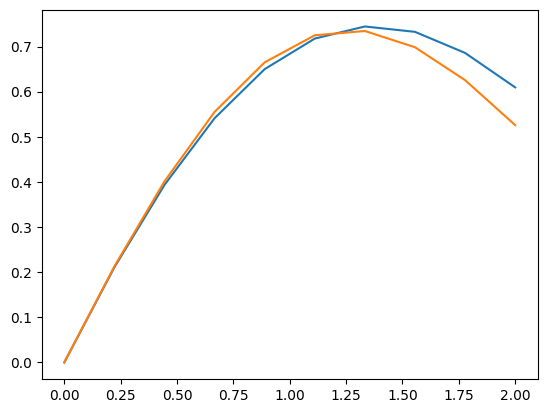

In [14]:
print(loss_func(W, x_space))

result = [psy_trial(xi, neural_net(W, xi)[0][0]) for xi in x_space]

plt.figure()
plt.plot(x_space, y_space)
plt.plot(x_space, result)
plt.show()

##### PDE

In [15]:
from autograd import grad, jacobian
import autograd.numpy as npr
import autograd.numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [16]:
nx = 10
ny = 10

dx = 1. / nx
dy = 1. / ny

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)

In [17]:
def analytic_solution(x):
    return ( 1 / (np.exp(np.pi) - np.exp(-np.pi))) * np.sin(np.pi * x[0]) * (np.exp(np.pi * x[1]) - np.exp(-np.pi * x[1]))

surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])
        
fig = plt.figure()
ax = fig.gca(projection = '3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride = 1, cstride = 1, cmap = cm.viridis, linewidth = 0, antialiased = False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [18]:
def f(x):
    return 0.

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def A(x):
    return x[1] * np.sin(np.pi * x[0])


def psy_trial(x, net_out):
    return A(x) + x[0] * (1 - x[0]) * x[1] * (1 - x[1]) * net_out


def loss_function(W, x, y):
    loss_sum = 0.
    
    for xi in x:
        for yi in y:
            
            input_point = np.array([xi, yi])
            
            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)
            
            psy_t = psy_trial(input_point, net_out)
            psy_t_jacobian = jacobian(psy_trial)(input_point, net_out)
            psy_t_hessian = jacobian(jacobian(psy_trial))(input_point, net_out)

            gradient_of_trial_d2x = psy_t_hessian[0][0]
            gradient_of_trial_d2y = psy_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = ((gradient_of_trial_d2x + gradient_of_trial_d2y) - func)**2
            loss_sum += err_sqr
        
    return loss_sum

In [19]:
W = [npr.randn(2, 10), npr.randn(10, 1)]
lmb = 0.001

print(neural_network(W, np.array([1, 1])))

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space, y_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

[0.75636869]


: 

In [41]:
print(loss_function(W, x_space, y_space))

surface2 = np.zeros((ny, nx))
surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])
        
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
            net_outt = neural_network(W, [x, y])[0]
            surface2[i][j] = psy_trial([x, y], net_outt)


print(surface[2])
print(surface2[2])
        
        
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface2, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

392.5205878645511
[0.         0.01982551 0.04209132 0.06953812 0.10554432 0.15454188
 0.22256189 0.31797687 0.45253137 0.64278761]
[0.         0.01678977 0.03088021 0.04982806 0.08115954 0.13197445
 0.20863173 0.31655081 0.46013352 0.64278761]


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>